In [3]:
from ipytree import Tree, Node

tree = Tree(stripes=True)
q_step = Node('q_step')
original = Node('original')
mcdwt = Node('mcdwt')
deadzone = Node('deadzone')
midrise = Node('midrise')
midthread = Node('midthread')
 
deadzone.nodes = [Node('inversa')]
midrise.nodes = [Node('inversa')]
midthread.nodes = [Node('inversa')]
 
q_step.nodes = [original, mcdwt, deadzone, midrise, midthread]
tree.nodes = [q_step]
tree

Tree(nodes=(Node(name='q_step', nodes=(Node(name='original'), Node(name='mcdwt'), Node(name='deadzone', nodes=…

In [1]:
!sudo rm -r /tmp/*

rm: cannot remove '/tmp/GiVscN_owz': No such file or directory
rm: cannot remove '/tmp/nt4PYF1Wc3': No such file or directory


In [2]:
q_step=32  
predictor=2  
valores_q_step = [8,16,20,55,60] 
tipos_cuantificacion = ["deadzone","midrise","midthreat"]
imagenes = 5

for q_step in valores_q_step:
    !mkdir /tmp/{q_step} && mkdir /tmp/{q_step}/original  &&  cp sequences/480/procesado/* /tmp/{q_step}/original/   
    !mkdir /tmp/{q_step}/mcdwt  && cp /tmp/{q_step}/original/* /tmp/{q_step}/mcdwt/  
    !cd src/ && python3 -O MDWT.py -p /tmp/{q_step}/mcdwt/
    !ls /tmp/{q_step}
    !cd src/ && python3 -O MCDWT.py -P {predictor} -p /tmp/{q_step}/mcdwt/ 
    for tipo in tipos_cuantificacion:
        !mkdir /tmp/{q_step}/{tipo}
        for imagen in range(0,imagenes): 
            ii ="{:03d}".format(imagen)
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/mcdwt/LH{ii}.png -o /tmp/{q_step}/{tipo}/LH{ii}.png -q {q_step}  
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/mcdwt/HL{ii}.png -o /tmp/{q_step}/{tipo}/HL{ii}.png -q {q_step}   
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/mcdwt/HH{ii}.png -o /tmp/{q_step}/{tipo}/HH{ii}.png -q {q_step} 
            !python3 tools/quantize.py -t {tipo} -i /tmp/{q_step}/mcdwt/LL{ii}.png -o /tmp/{q_step}/{tipo}/LL{ii}.png -q {q_step} 
        !mkdir /tmp/{q_step}/{tipo}/inversas  &&  cp /tmp/{q_step}/{tipo}/* /tmp/{q_step}/{tipo}/inversas  
        !cd src/ && python3 -O MCDWT.py -P {predictor} -p /tmp/{q_step}/{tipo}/inversas/ -b  
        !cd src/ && python3 -O MDWT.py -p /tmp/{q_step}/{tipo}/inversas/ -b  

mcdwt  original
cp: -r not specified; omitting directory '/tmp/8/deadzone/inversas'
cp: -r not specified; omitting directory '/tmp/8/midrise/inversas'
cp: -r not specified; omitting directory '/tmp/8/midthreat/inversas'
mcdwt  original
cp: -r not specified; omitting directory '/tmp/16/deadzone/inversas'
cp: -r not specified; omitting directory '/tmp/16/midrise/inversas'
cp: -r not specified; omitting directory '/tmp/16/midthreat/inversas'
mcdwt  original
cp: -r not specified; omitting directory '/tmp/20/deadzone/inversas'
cp: -r not specified; omitting directory '/tmp/20/midrise/inversas'
cp: -r not specified; omitting directory '/tmp/20/midthreat/inversas'
mcdwt  original
cp: -r not specified; omitting directory '/tmp/55/deadzone/inversas'
cp: -r not specified; omitting directory '/tmp/55/midrise/inversas'
cp: -r not specified; omitting directory '/tmp/55/midthreat/inversas'
mcdwt  original
cp: -r not specified; omitting directory '/tmp/60/deadzone/inversas'
cp: -r not specified; omit

In [3]:
!cat suma.py


{'deadzone': [[391697.0, 1073698311.2608795], [228686.0, 1073662450.2719333], [197028.0, 1073643142.1302109], [99874.0, 1073495948.7754984], [93818.0, 1073479889.4991204]], 'midrise': [[1723153.0, 1073819835.4241166], [1615800.0, 1073908961.5244446], [1593965.0, 1073951473.167692], [1516859.0, 1074345901.8717356], [1511429.0, 1074422455.530169]], 'midthreat': [[512378.0, 1073730840.4774187], [310870.0, 1073733418.252126], [268285.0, 1073732076.7267239], [133699.0, 1073721810.96637], [124247.0, 1073715934.6591517]]}


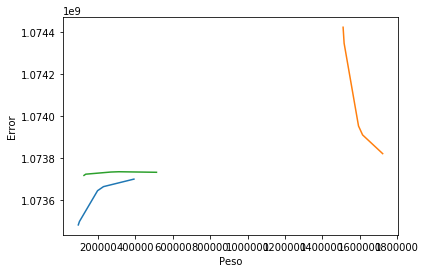

In [4]:
from suma import Sumando
try:
    import matplotlib.pyplot as plt
except:
    os.system("pip3 install matplotlib --user")
    import matplotlib.pyplot as plt

imagenes = 5
valores_q_step = [8,16,20,55,60] 
tipos_cuantificacion = ["deadzone","midrise","midthreat"]
resultado_total = {"deadzone" : [] ,"midrise" : [],"midthreat":[]}
s = Sumando()
for q_step in valores_q_step: 
    diccionario = {}
    for tipo in tipos_cuantificacion:        
        pesos = s.GetPesos(str(tipo),q_step)
        MSE_almacenado = 0.0
        for imagen in range(0,imagenes):
            MSE_almacenado+= s.GetMSE(tipo,imagen,q_step)
        resultado_total[tipo].append([pesos,MSE_almacenado/imagenes]) 

print(resultado_total)
plt.figure()
diccionario = resultado_total
for tipo in diccionario:
    plot = plt.plot([i[0] for i in diccionario[tipo]],[i[1] for i in diccionario[tipo]],label=tipo)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper', borderaxespad=0.)
plt.ylabel('Error')
plt.xlabel('Peso')
#plt.title(tipo)
plt.show()

In [5]:
from suma import Sumando
try:
    import matplotlib.pyplot as plt
except:
    os.system("pip3 install matplotlib --user")
    import matplotlib.pyplot as plt

MSE_almacenado = s.GetMSE("deadzone", 4 , 8)
print("0 " + str(MSE_almacenado))
MSE_almacenado = s.GetMSE("deadzone", 4 , 60)
print("1 " + str(MSE_almacenado))
        

0 1073658494.6991413
1 1073155747.2431433
